<a href="https://colab.research.google.com/github/amityu/BigData/blob/main/hw1/hw1_yuval_amit_032191025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

In [ ]:
!mkdir /root/.kaggle/
!pip install kaggle 
import json

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amyuval","key":""}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
!ls

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
datasets  sample_data


# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [ ]:
import os
os.getcwd()


'/home/amityu/code/BigData/hw1'

In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/us-baby-name

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/us-baby-names -f database.sqlite -p ./datasets/us-baby-name/database.sqlite 

!unzip  ./datasets/us-baby-name/database.sqlite/* -d  ./datasets/us-baby-name/database.sqlite

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/us-baby-name’: File exists
 97% 127M/131M [00:05<00:00, 20.8MB/s]
100% 131M/131M [00:05<00:00, 23.8MB/s]
Archive:  ./datasets/us-baby-name/database.sqlite/database.sqlite.zip
  inflating: ./datasets/us-baby-name/database.sqlite/database.sqlite  


In [ ]:
!kaggle datasets download kaggle/us-baby-names -f NationalNames.csv -p ./datasets/us-baby-name/NationalNames
!unzip  ./datasets/us-baby-name/NationalNames/* -d  ./datasets/us-baby-name/NationalNames


 44% 5.00M/11.5M [00:00<00:00, 14.0MB/s]
100% 11.5M/11.5M [00:00<00:00, 25.6MB/s]
Archive:  ./datasets/us-baby-name/NationalNames/NationalNames.csv.zip
  inflating: ./datasets/us-baby-name/NationalNames/NationalNames.csv  


In [ ]:
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

import numpy as np
%matplotlib inline
my_path = "./datasets/us-baby-name/"
df = pd.read_csv(my_path + 'NationalNames/NationalNames.csv')
conn = sqlite3.connect(my_path + 'database.sqlite/database.sqlite')#connecting to the database
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS Names (Id,  Gender, Name, Count, Year)')
c.executemany('insert into Names (Id, Gender, Name, Count, Year) values (?,?,?,?,?)' , (df[['Id','Gender','Name','Count', 'Year']].values))
conn.commit()
c.close()
conn.close()


**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

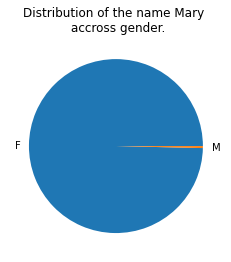

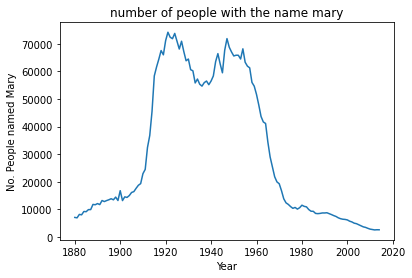

Marry found 4130441 times in database
 Time for enqirey 0.177974


In [ ]:

from timeit import  timeit
conn = sqlite3.connect(my_path + 'database.sqlite/database.sqlite')#connecting to the database
c = conn.cursor()
def query():
    c.execute("SELECT Sum  (Count) FROM Names WHERE Name = 'Mary'")
    print ('Marry found %d times in database' %c.fetchone()[0])

c.execute("SELECT Gender,  Sum (Count) FROM Names WHERE Name = 'Mary' group by Gender")
#print(c.fetchall())
x= np.array(c.fetchall())
plt.pie(x= x[:,1], labels = x[:,0])
plt.title('Distribution of the name Mary \n accross gender.')
plt.show()


c.execute("SELECT Year,  Sum (Count) FROM Names WHERE Name = 'Mary' group by Year")
x = np.array(c.fetchall())
plt.plot(x[:,0], x[:,1])
plt.title('number of people with the name mary')
plt.xlabel('Year')
plt.ylabel('No. People named Mary')
plt.show()
print (' Time for enqirey %f' %timeit(query, number=1))


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 4 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "032191025"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 2


***Question 1:*** Write a function that returns how many babies were born in a given state in a given year.
Use it to calculate the number of babies born in TX in 1986 (10pt)



***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1988 and 1995  (10pt)

In [ ]:
def female_between_years(start, finish):
    c.execute(''' SELECT
        SUM (Count)
        FROM Names
        WHERE Gender = 'F'  AND Year BETWEEN ? AND ?
        '''
        ,(start,finish))
    return  c.fetchone()[0]
print('No of females between the years is %d'%female_between_years(1988, 1995))

No of females between the years is 14589771


**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Wasington in 1987 (10pt)

**Question 4:** Write a function that returns how many male babies named _Robert where born in a given state in a given year. Use it to find the state in which the highest number of babies _Robert_ where born in 2010 (10pt)

**Question (for everyone):** For the state of CA write code that calculates the second most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [ ]:
import numpy as np
c.execute('DROP table if exists  name_count_query')
c.execute('''CREATE TABLE  name_count_query AS
           SELECT Id,Name, Gender, (Year/10)*10 AS decade , SUM (Count) AS name_count
             FROM StateNames
             WHERE State = 'CA'

             GROUP BY Gender, Name''')

def second_most_by_gender_and_decade(gen, dec):
    c.execute('''
        Select Name, Gender, decade, name_count
        From name_count_query
        Where Gender = ? and decade = ?
        ORDER BY name_count DESC ''', (gen,dec))
    return c.fetchall()[1][0]

for decade in range(1910,2020,10):
    try:
        print ('decade %d second most poplar female name is '%decade + second_most_by_gender_and_decade('F', decade))
    except:
        print ('exception')
    print ('decade %d second most poplar male name is '%decade + second_most_by_gender_and_decade('M', decade))

#second_most_by_gender_and_decade('F',1920)






decade 1910 second most poplar female name is Matsuko
decade 1910 second most poplar male name is Pershing
decade 1920 second most poplar female name is Mitsuko
decade 1920 second most poplar male name is Tsutomu
decade 1930 second most poplar female name is Fumiko
decade 1930 second most poplar male name is Kazuo
decade 1940 second most poplar female name is Kazuko
decade 1940 second most poplar male name is Hideo
decade 1950 second most poplar female name is Elvera
decade 1950 second most poplar male name is Dickie
decade 1960 second most poplar female name is Gerry
decade 1960 second most poplar male name is Kay
decade 1970 second most poplar female name is Gertrude
decade 1970 second most poplar male name is Gale
decade 1980 second most poplar female name is Pam
decade 1980 second most poplar male name is Doug
decade 1990 second most poplar female name is Carole
decade 1990 second most poplar male name is Kim
decade 2000 second most poplar female name is Peggy
decade 2000 second mo

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

In [ ]:
!mkdir ./datasets/cacao
!kaggle datasets download rombikuboktaeder/choco-flavors -f flavors_of_cacao.csv -p ./datasets/cacao/choco-flavors


  0% 0.00/125k [00:00<?, ?B/s]
100% 125k/125k [00:00<00:00, 45.9MB/s]


In [ ]:
import sqlite3
import pandas as pd
# load the data into a Pandas DataFrame
coco_df = pd.read_csv('./datasets/cacao/choco-flavors/flavors_of_cacao.csv', encoding='utf-8')
coco_df.columns = [col.replace( '\n', '') for col in coco_df.columns ]
conn = sqlite3.connect('./datasets/cacao/cacao_database')
# write the data to a sqlite table
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS coco (CompanyLocation,  CocoaPercent)')
c.executemany('insert into coco  (CompanyLocation, CocoaPercent) values (?,?)' , (coco_df.values[:,[5,4]]))
conn.commit()
#coco_df = coco_df.astype(str)
#coco_df.to_sql('coco', conn,dtype=type, if_exists='replace', index = False)
conn.commit()
conn.close()

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Fiji' (15pt)

**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

In [ ]:
conn = sqlite3.connect('./datasets/cacao/cacao_database')

c = conn.cursor()
def max_and_average_percent(country  = 'Switzerland'):

    c.execute('''select CompanyLocation, avg(CocoaPercent), max(CocoaPercent)
        From coco
        WHERE CompanyLocation = ?''', (country,))



    result = c.fetchone()
    print('Average {:.2f} and max {} cocoa percentage in {}'.format(result[1], result[2], result[0]))

max_and_average_percent()
conn.close()

Average 71.21 and max 88% cocoa percentage in Switzerland


**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

# 3. Kickstarter Projects Dataset (25pt)

In [ ]:
!kaggle datasets list -s Kickstarter

ref                                                     title                                       size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------  ----  -------------------  -------------  
kemical/kickstarter-projects                            Kickstarter Projects                        37MB  2018-02-08 09:02:30          60319  
socathie/kickstarter-project-statistics                 Kickstarter Project Statistics               1MB  2019-11-14 06:38:31           6292  
codename007/funding-successful-projects                 Funding Successful Projects on Kickstarter  20MB  2017-06-20 17:37:38           3141  
yashkantharia/kickstarter-campaigns                     Kickstarter Campaigns                       12MB  2019-03-03 13:46:08           1347  
oscarvilla/kickstarter-nlp                              kickstarter NLP                             11MB  2018-08-09 01:38:57            498  

In [ ]:
!mkdir ./datasets/kick


In [ ]:
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kick

 90% 33.0M/36.8M [00:01<00:00, 7.41MB/s]
100% 36.8M/36.8M [00:01<00:00, 20.6MB/s]


In [ ]:
!unzip ./datasets/kick/* -d ./datasets/kick



Archive:  ./datasets/kick/kickstarter-projects.zip
  inflating: ./datasets/kick/ks-projects-201612.csv  
  inflating: ./datasets/kick/ks-projects-201801.csv  


Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [ ]:
!pip install pony

     |████████████████████████████████| 313 kB 4.3 MB/s 


In [ ]:
from pony.orm import *
import sqlite3
import pandas as pd
import os
from tqdm.notebook import  tqdm
# load the data into a Pandas DataFrame
kick_df = pd.read_csv('./datasets/kick/ks-projects-201612.csv' ,encoding='cp1252')
x= kick_df.values[:,[1,8,2]]
#conn = sqlite3.connect('./datasets/kick/kick_database')
!rm ./datasets/kick/kick_db
db = Database()
db.bind('sqlite', os.getcwd() + '/datasets/kick/kick_db', create_db=True)
set_sql_debug(True)

class Project(db.Entity):
    usdpledged  = Required(float)
    category = Required(str)
    name =Required(str)
db.generate_mapping(create_tables=True)
e_count = 0
kick_df = kick_df[['name ','usd pledged ','category ']].dropna()
for indx, row  in tqdm(kick_df.iterrows()):
    try:
        Project(name=row['name '],usdpledged = row['usd pledged '],category =row['category '])
    except:
        e_count +=1

print('errors %d'%e_count)
commit()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


rm: cannot remove './datasets/kick/kick_db': No such file or directory
GET CONNECTION FROM THE LOCAL POOL
PRAGMA foreign_keys = false
BEGIN IMMEDIATE TRANSACTION
CREATE TABLE "Project" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT,
  "usdpledged" REAL NOT NULL,
  "category" TEXT NOT NULL,
  "name" TEXT NOT NULL
)

SELECT "Project"."id", "Project"."usdpledged", "Project"."category", "Project"."name"
FROM "Project" "Project"
WHERE 0 = 1

COMMIT
PRAGMA foreign_keys = true
CLOSE CONNECTION


0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.

INSERT INTO "Project" ("usdpledged", "category", "name") VALUES (?, ?, ?)
[25.0, 'Theater', 'Womynkind East Coast -  Kickstart the End of Violence - Tour']

INSERT INTO "Project" ("usdpledged", "category", "name") VALUES (?, ?, ?)
[0.0, 'Documentary', "Paying for Marshawn Lynch's Fines"]

INSERT INTO "Project" ("usdpledged", "category", "name") VALUES (?, ?, ?)
[561.0, 'Childrenswear', 'Honolulu Baby Co: Organic Apparel Made With A Little Aloha']

INSERT INTO "Project" ("usdpledged", "category", "name") VALUES (?, ?, ?)
[0.0, 'Television', "WEEKEND BACHELOR'S OF DETROIT"]

INSERT INTO "Project" ("usdpledged", "category", "name") VALUES (?, ?, ?)
[7997.0, 'Indie Rock', 'The Minders "Into The River" Album Release']

INSERT INTO "Project" ("usdpledged", "category", "name") VALUES (?, ?, ?)
[175.09922325, 'Performance Art', 'EXPtheatre']

INSERT INTO "Project" ("usdpledged", "category", "name") VALUES (?, ?, ?)
[0.0, 'Food', 'Clutch Deliv

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code
your_id  = "032191025"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

In [ ]:
q = select ( (p.category,  avg(p.usdpledged) ) for p in  Project).order_by(-2)
print(' Category with highest pledged USD and its average ammount:')
print ( list(q)[0])


 Category with highest pledged USD and its average ammount:
BEGIN IMMEDIATE TRANSACTION
SELECT "p"."category", AVG("p"."usdpledged")
FROM "Project" "p"
GROUP BY "p"."category"
ORDER BY 2 DESC

('Camera Equipment', 59741.281679537475)


**Question 3:** In which month occurred the highest number of projects? (15 pt)

## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

In [ ]:
!mkdir ./datasets/oscar
!kaggle datasets download theacademy/academy-awards -p ./datasets/oscar

  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 69.1MB/s]


In [ ]:
!unzip ./datasets/oscar/* -d ./datasets/oscar


Archive:  ./datasets/oscar/academy-awards.zip
  inflating: ./datasets/oscar/database.csv  


In [ ]:
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

import numpy as np
%matplotlib inline

In [ ]:
oscar_df = pd.read_csv('./datasets/oscar/database.csv')
# write the data to a sqlite table
oscar_df = oscar_df[['Award', 'Name', 'Film']]
!rm ./datasets/oscar/oscar_database
conn = sqlite3.connect('./datasets/oscar/oscar_database')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS oscar (Award,  Name, Film)')
c.executemany('insert into oscar (Award, Name, Film) values (?,?,?)' , (oscar_df.values))
conn.commit()
c.execute('''select Award, Name, Count(Film)
            From oscar
            WHERE  Award = 'Actor'
            Group by Name
            order by Count(Film) DESC''')
print (' and the actor is ')
c.fetchone()

rm: cannot remove './datasets/oscar/oscar_database': No such file or directory
 and the actor is 


('Actor', 'Spencer Tracy', 9)

**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5. Select a Dataset (15pt)

**Open Question:** Select an interesting dataset and use SQL to discover something interesting (15pt). **Bonus:** Use BigQuery (2pt)

will ask which 3 countries have the maximum average height of male and women

In [ ]:
!mkdir ./datasets/height
!kaggle datasets download majyhain/height-of-male-and-female-by-country-2022 -p ./datasets/height
!unzip ./datasets/height/*  -d ./datasets/height


  0% 0.00/3.53k [00:00<?, ?B/s]
100% 3.53k/3.53k [00:00<00:00, 5.67MB/s]
Archive:  ./datasets/height/height-of-male-and-female-by-country-2022.zip
  inflating: ./datasets/height/Height of Male and Female by Country 2022.csv  


In [ ]:
height_df = pd.read_csv('./datasets/height/Height of Male and Female by Country 2022.csv')
# write the data to a sqlite table
height_df = height_df[['Country Name', 'Male Height in Cm', 'Female Height in Cm']]
!rm ./datasets/height/height_database
conn = sqlite3.connect('./datasets/height/height_database')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS height (Country,  Male, Female)')
c.executemany('insert into height  (Country, Male, Female) values (?,?,?)' , (height_df.values))
conn.commit()
c.execute('''select Country , (Male+Female)/2 as average
            From height
            order by average DESC''')
print ('The 3 tallest countries are: ')
c.fetchmany(3)

rm: cannot remove './datasets/height/height_database': No such file or directory
The 3 tallest countries are: 


[('Netherlands', 177.07), ('Montenegro', 176.63), ('Estonia', 175.725)]